In [15]:
import pandas as pd
import numpy as np

In [16]:
df_rotores = pd.read_csv('../../abdias_suez/forces_V1.csv')
df_total = pd.read_csv('../../abdias_suez/forces_V2.csv')


In [17]:
df_total['fx_rotores'] = (df_rotores['Fx_popa_bom'] + df_rotores['Fx_popa_bor'] + df_rotores['Fx_proa_bom'] + df_rotores['Fx_proa_bor'])/1000
df_total['fy_rotores'] = (df_rotores['Fy_popa_bom'] + df_rotores['Fy_popa_bor'] + df_rotores['Fy_proa_bom'] + df_rotores['Fy_proa_bor'])/1000
df_total['fx_casco_sup'] = df_total['fx'] - df_total['fx_rotores']
df_total['fy_casco_sup'] = df_total['fy'] - df_total['fy_rotores']

parcela_x_rotores = df_total['fx_rotores'] / df_total['fx']
parcela_x_casco_sup = df_total['fx_casco_sup'] / df_total['fx']
parcela_y_rotores = df_total['fy_rotores'] / df_total['fy']
parcela_y_casco_sup = df_total['fy_casco_sup'] / df_total['fy']

df_total['cx_rotores'] = df_total['cx'] * parcela_x_rotores
df_total['cx_casco_sup'] = df_total['cx'] * parcela_x_casco_sup

df_total['cy_rotores'] = df_total['cy'] * parcela_y_rotores
df_total['cy_casco_sup'] = df_total['cy'] * parcela_y_casco_sup
df_total['Mz_popa_bom'] = np.abs(df_rotores['Mz_popa_bom'])
df_total['Mz_popa_bor'] = np.abs(df_rotores['Mz_popa_bor'])
df_total['Mz_proa_bom'] = np.abs(df_rotores['Mz_proa_bom'])
df_total['Mz_proa_bor'] = np.abs(df_rotores['Mz_proa_bor'])
df_total['Mz_total'] = df_total['Mz_popa_bom'] + df_total['Mz_popa_bor'] + df_total['Mz_proa_bom'] + df_total['Mz_proa_bor']


In [18]:
df_total.to_csv('../../abdias_suez/forces_CFD.csv')

In [19]:
df_total['Mz_total'].min()


7997.900000000001

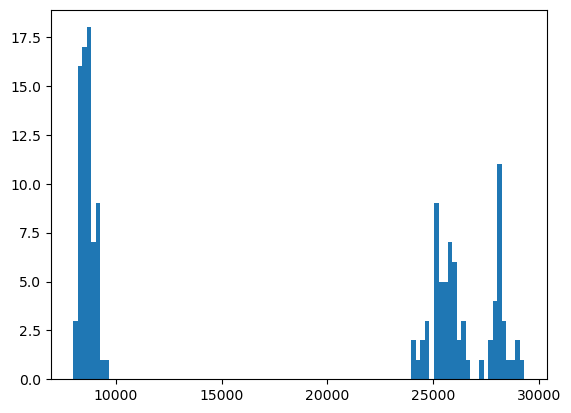

In [20]:
import matplotlib.pyplot as plt
plt.hist(df_total['Mz_total'], bins=100)
plt.show()